In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Data Loading

In [3]:
#Load the dataset
data_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2
    
)

data_path = r'E:\4-2\Eurosat Dataset\2750'

data = data_generator.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    classes=['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake'] 

)

Found 27000 images belonging to 10 classes.


In [4]:
#Training & Testing Dataset 

In [5]:
train_data = data_generator.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=8,
    class_mode='categorical',
    subset='training',
    classes=['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']

    

)

Found 21600 images belonging to 10 classes.


In [6]:
test_data = data_generator.flow_from_directory(
    r'E:\4-2\Eurosat Dataset\2750',
    target_size=(64, 64),
    batch_size=1,
    subset='validation',
    class_mode='categorical',
    classes=['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']

    
)

Found 5400 images belonging to 10 classes.


In [7]:
#Model building using CNN

CNN = keras.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10,activation='softmax')
        
])

In [8]:
CNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
CNN.fit(train_data, validation_data=test_data, epochs=10)


Epoch 1/10


2700/2700 [==============================] - 306s 112ms/step - loss: 1.2754 - accuracy: 0.5066 - val_loss: 0.9480 - val_accuracy: 0.6443
Epoch 2/10
2700/2700 [==============================] - 673s 249ms/step - loss: 0.8031 - accuracy: 0.7093 - val_loss: 0.6388 - val_accuracy: 0.7670
Epoch 3/10
2700/2700 [==============================] - 405s 150ms/step - loss: 0.6573 - accuracy: 0.7629 - val_loss: 0.6473 - val_accuracy: 0.7746
Epoch 4/10
2700/2700 [==============================] - 569s 211ms/step - loss: 0.5768 - accuracy: 0.7940 - val_loss: 0.6556 - val_accuracy: 0.7746
Epoch 5/10
2700/2700 [==============================] - 450s 167ms/step - loss: 0.5082 - accuracy: 0.8202 - val_loss: 0.5700 - val_accuracy: 0.7978
Epoch 6/10
2700/2700 [==============================] - 436s 161ms/step - loss: 0.4638 - accuracy: 0.8372 - val_loss: 0.4763 - val_accuracy: 0.8300
Epoch 7/10
2700/2700 [==============================] - 442s 164ms/step - loss: 0.4342 - accuracy: 0.8470 - va

In [10]:
CNN.evaluate(test_data)

5400/5400 [==============================] - 195s 36ms/step - loss: 0.4063 - accuracy: 0.8633


[0.40630030632019043, 0.8633333444595337]

In [12]:
from sklearn.metrics import confusion_matrix,classification_report
y_true = []
for i in range(test_data.samples // test_data.batch_size):
    _, batch_labels = test_data.next()
    y_true.extend(np.argmax(batch_labels, axis=-1))

# Generating predictions for test data
y_probab = CNN.predict(test_data, steps=np.ceil(test_data.samples/test_data.batch_size))

#Generating predicted classes for test data
y_pred = np.argmax(y_probab, axis=-1)

#Generating confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Classification Report: \n", classification_report(y_true, y_pred))

5400/5400 [==============================] - 116s 21ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       600
           1       0.92      0.97      0.94       600
           2       0.88      0.70      0.78       600
           3       0.80      0.82      0.81       500
           4       0.80      0.97      0.88       500
           5       0.89      0.77      0.83       400
           6       0.78      0.77      0.77       500
           7       0.94      0.90      0.92       600
           8       0.74      0.90      0.81       500
           9       0.98      0.95      0.97       600

    accuracy                           0.86      5400
   macro avg       0.86      0.86      0.86      5400
weighted avg       0.87      0.86      0.86      5400



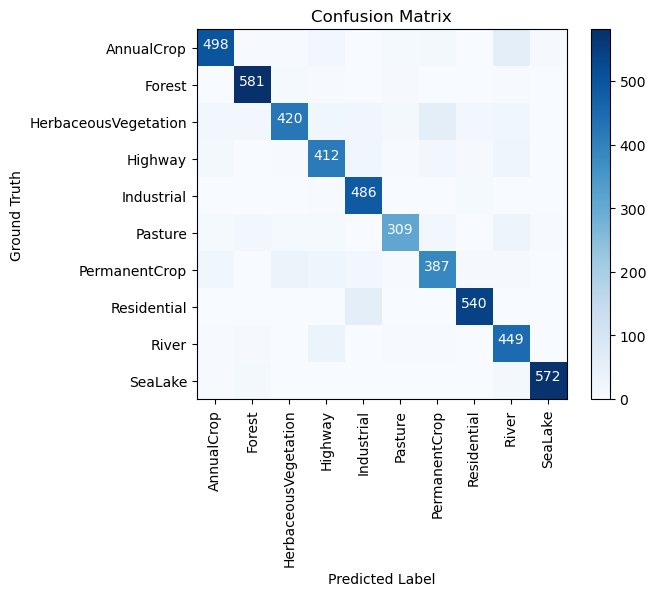

In [13]:
#Plotting Confusion Matrix

plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(data.class_indices))
plt.xticks(tick_marks, data.class_indices, rotation=90)
plt.yticks(tick_marks, data.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('Ground Truth')

#adding values in each cell
thresh = cm.max() / 2.
for i, j in zip(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

In [ ]:
#CLASSIFICATION RESULTS OF 20 SAMPLE IMAGES

In [14]:
import os


# Select 20 sample images from the test data
sample_data = []
for i in range(20):
    sample_data.append(test_data[i][0][0])

# Generating predictions for sample images
y_prob = CNN.predict(np.array(sample_data))

# Getting predicted classes for the sample images
y_pred = np.argmax(y_prob, axis=-1)

# Getting all class labels
class_labels = train_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}

# Create output directory for saving results
output_dir = 'sample_results'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

# Save classification results for each sample image
for i in range(len(y_pred)):
    filename = 'sample_{}.jpg'.format(i+1)
    label = class_labels[y_pred[i]]
    result = 'Predicted class: {}'.format(label)
    with open(os.path.join(output_dir, 'sample_{}.txt'.format(i+1)), 'w') as f:
        f.write(result)
    keras.preprocessing.image.save_img(os.path.join(output_dir, filename), sample_data[i])

1/1 [==============================] - 0s 428ms/step
